# **IDS Project**

###### DATASET- https://www.kaggle.com/uciml/adult-census-income

This dataset is taken from kaggle. The purpose of creating this dataset is to predict whether a person's income will be greater or less than 50K, with features such as age, education, and job. But in this notebook, before building a model, I analyzed the data and looked at some of its properties and made some visualizations. I hope you will like it.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('adult.csv')

## Data Pre Processing

In [3]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
data.shape

(32561, 15)

Thus the data has total of 32561 rows/instances and 15 columns including the y-label

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

As we can see that the dataset has 0 null values. But there are some unwanted values with wrong format that needs to be restructed before training and visualiazation. For example, the dataset contains values like '?' that needs to be addressed.
(treating '?' as null values)

In [10]:
for column in data.columns:
    print(f"{column} = {data[data[column] == '?'].shape[0]}")

age = 0
workclass = 1836
fnlwgt = 0
education = 0
education.num = 0
marital.status = 0
occupation = 1843
relationship = 0
race = 0
sex = 0
capital.gain = 0
capital.loss = 0
hours.per.week = 0
native.country = 583
income = 0


From this we can infer that there are three categorical features with '?' values that does not have any meaning. Either we can remove these rows or fill the values with the mode of the respective column.

In [11]:
data["workclass"][data["workclass"] == "?"] = data["workclass"].mode()[0] #Replace the '?' values with the mode
data["occupation"][data["occupation"] == "?"] = data["occupation"].mode()[0]
data["native.country"][data["native.country"] == "?"] = data["native.country"].mode()[0]

<ipython-input-11-338ec57fa79f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["workclass"][data["workclass"] == "?"] = data["workclass"].mode()[0] #Replace the '?' values with the mode
<ipython-input-11-338ec57fa79f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["occupation"][data["occupation"] == "?"] = data["occupation"].mode()[0]
<ipython-input-11-338ec57fa79f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["n

In [12]:
for column in data.columns:
    print(f"{column} = {data[data[column] == '?'].shape[0]}")

age = 0
workclass = 0
fnlwgt = 0
education = 0
education.num = 0
marital.status = 0
occupation = 0
relationship = 0
race = 0
sex = 0
capital.gain = 0
capital.loss = 0
hours.per.week = 0
native.country = 0
income = 0


At this point no column in the data has any null values. This concludes our initial data preprocessing and now we will visualize some of the features to get further understanding of the data.

## Data Visualization

In [13]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

### Categorical Analysis

Analyzing few of the important categorical features

In [14]:
categorical_features = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']

###### Workclass

<AxesSubplot:>

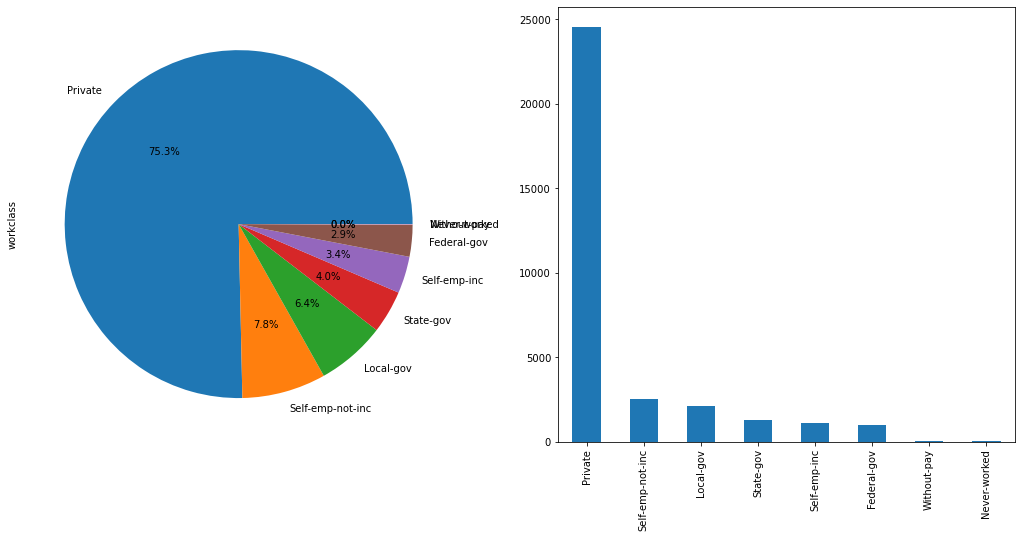

In [15]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['workclass'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
data['workclass'].value_counts().plot.bar(ax=ax[1])


As we can see that more than 70% of the total population are working in the private sector.

Text(0, 0.5, '')

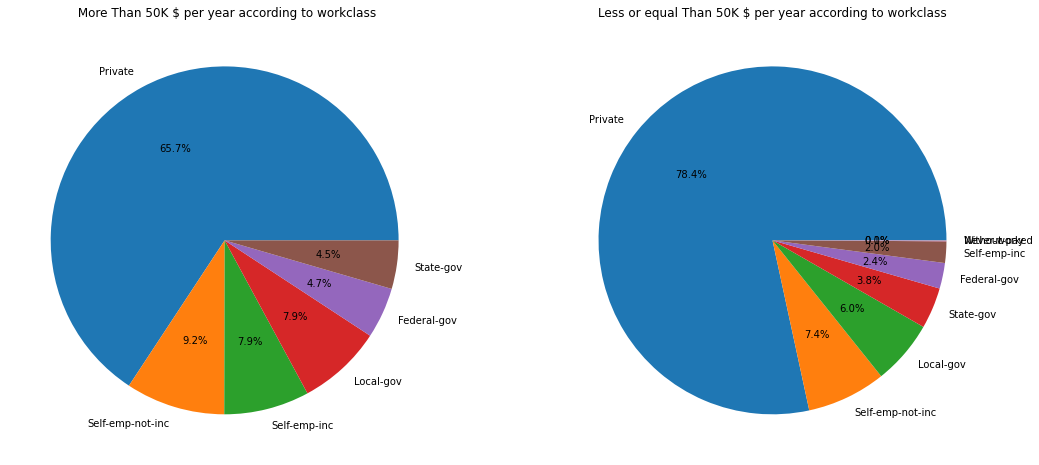

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['income'] == '>50K']['workclass'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title(' More Than 50K $ per year according to workclass')
ax[0].set_ylabel('')

data[data['income'] == '<=50K']['workclass'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to workclass')
ax[1].set_ylabel('')

From the above pie chart we can observe many assumption including the fact that:-

Most of the high paying job(>$ 50k) can be found at Private Sector and at the same time most of the low paying job are also found at public sector.

###### Age

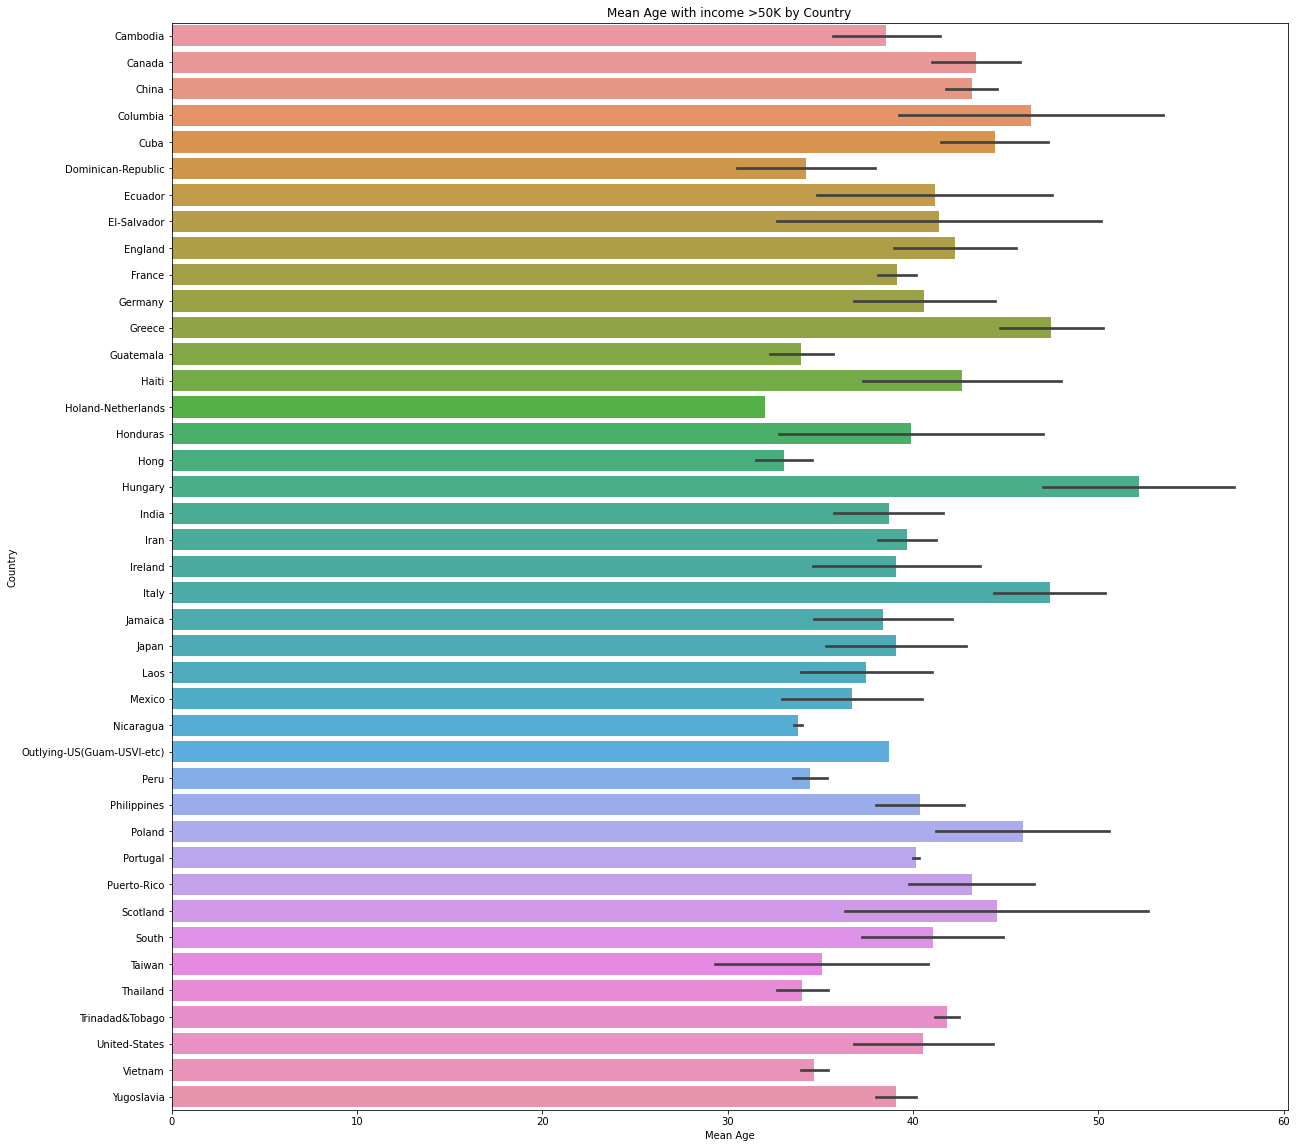

In [17]:
temp_data = data[["native.country","income","age"]].groupby(["native.country","income"]).mean()

temp_data = temp_data.reset_index()

plt.figure(figsize = (20,20))
sns.barplot(x = "age", y = "native.country", data = temp_data)
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with income >50K by Country")
plt.show()

This plot is useful for understanding the mean age of instances grouped by their native country with income >50K

In [18]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


###### Marital Status

<AxesSubplot:ylabel='marital.status'>

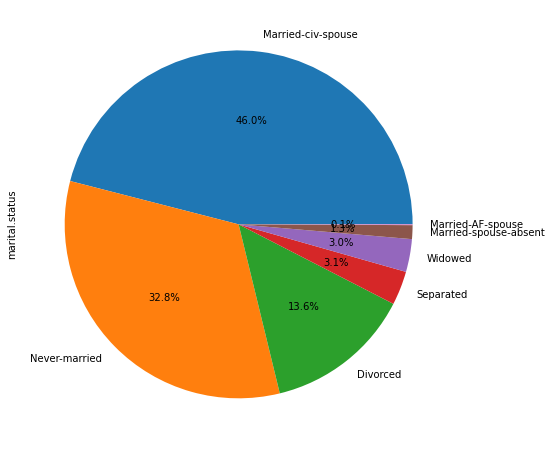

In [19]:
plt.figure(figsize=(8,8))
data['marital.status'].value_counts().plot.pie(autopct = '%1.1f%%')

This pie chart can provide us the basic information regarding the marital status that more than 45% of population are married.

In [20]:
data['marital.status'].nunique()

7

In [21]:
mt = ['Never-married','Divorced','Separated','Widowed','Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
temp1 = data[data['income']=='>50K']
ls1 = []
ls2 = []
for marital_type in mt:
    d = temp1[temp1['marital.status'] == marital_type]
    ls1.append(marital_type)
    count = d.shape[0]
    ls2.append(count)


temp2 = data[data['income']=='<=50K']
ls3 = []
ls4 = []
for marital_type in mt:
    d = temp2[temp2['marital.status'] == marital_type]
    ls3.append(marital_type)
    count = d.shape[0]
    ls4.append(count)
    


<ipython-input-22-cc03f21e249f>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


<Figure size 1440x360 with 0 Axes>

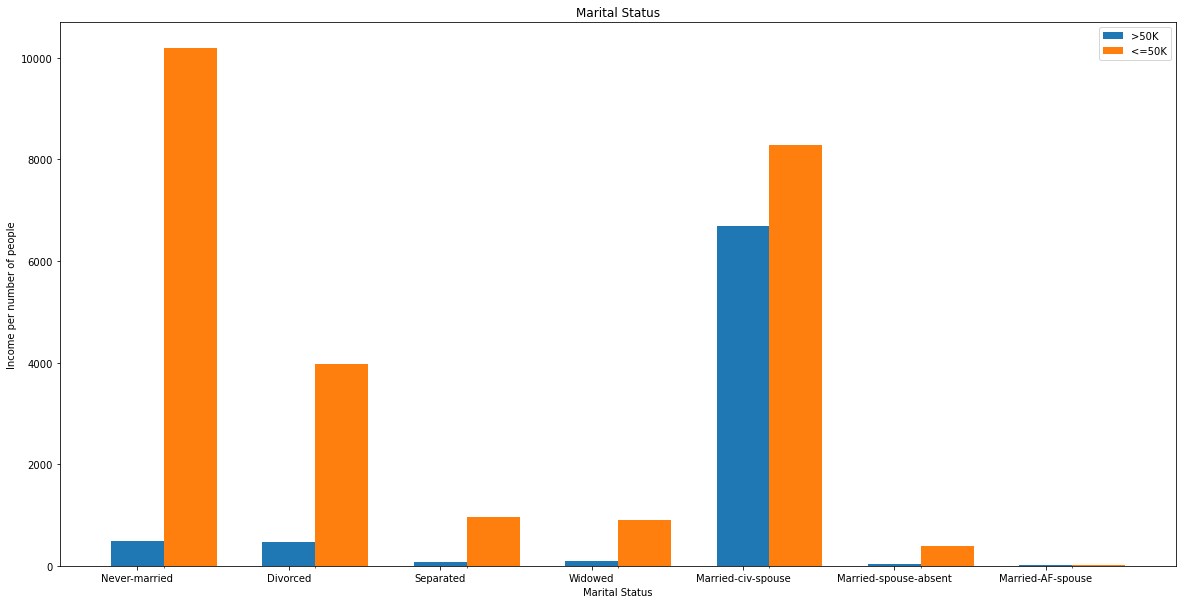

In [22]:
labels = ['Never-married','Divorced','Separated','Widowed','Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(20,5))
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
rects1 = ax.bar(x - width/2, ls2, width, label='>50K',tick_label=labels)
rects2 = ax.bar(x + width/2, ls4, width, label='<=50K')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Income per number of people')
ax.set_xlabel('Marital Status')
ax.set_title('Marital Status')
ax.set_xticks(x, labels)
ax.legend()

plt.show()


This graph shows us the count of each type of marital status from both the labels(>50K,<=50K) and comapares them for better understanding.

###### Education

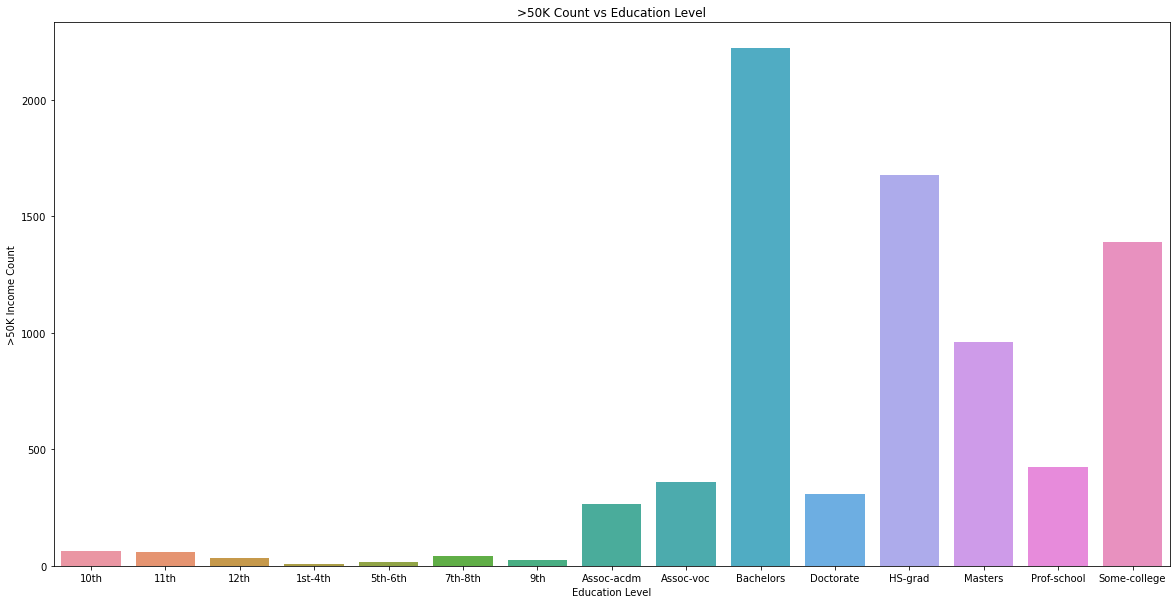

In [95]:
plt.figure(figsize = (20,10))
temp = data[data['income']=='>50K']
ed_data = temp.groupby("education")["income"].count()
ed_data = ed_data.reset_index()


sns.barplot(x = "education", y ="income", data = ed_data)
plt.xlabel("Education Level")
plt.ylabel(">50K Income Count")
plt.title(">50K Count vs Education Level")
plt.show()

This graph give us insight on how different level of education are distributed (income is >50K)

###### Male and Female Ratios

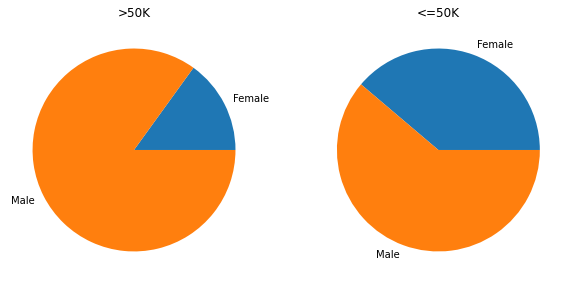

In [24]:
temp = data[data['income']=='>50K']
sex_ratio = temp.groupby('sex')['income'].count()
sex_ratio = sex_ratio.reset_index()

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(x = sex_ratio["income"], labels = ["Female","Male"])
plt.title(">50K")

temp = data[data['income']=='<=50K']
sex_ratio = temp.groupby('sex')['income'].count()
sex_ratio = sex_ratio.reset_index()
 
plt.subplot(1,2,2)
plt.pie(x = sex_ratio["income"], labels = ["Female","Male"])
plt.title("<=50K")
plt.show()

This pie chart shows us the male female ratio for both type of labels

###### Occupation

<AxesSubplot:ylabel='occupation'>

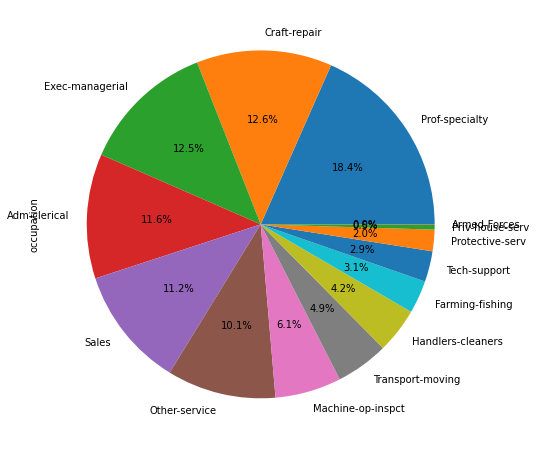

In [25]:
plt.figure(figsize=(8, 8))
data['occupation'].value_counts().plot.pie(autopct='%1.1f%%')

Text(0, 0.5, '')

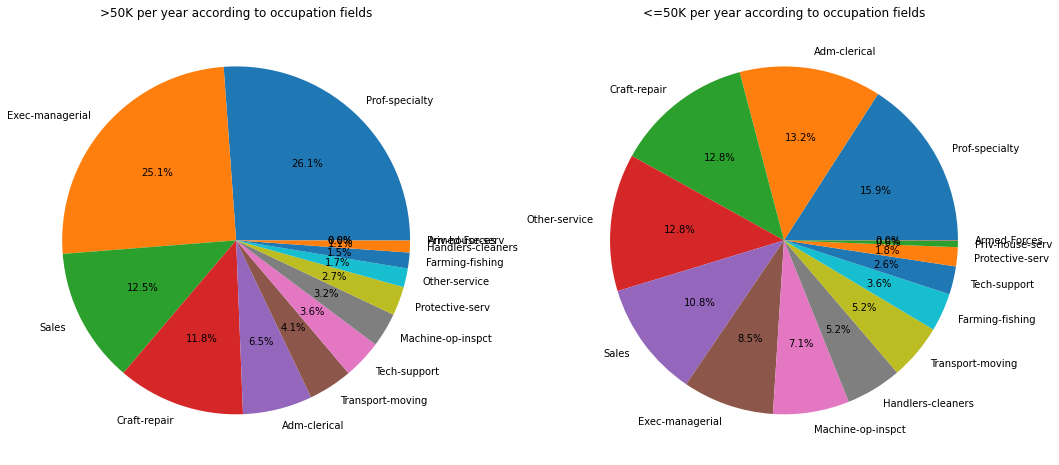

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['income'] == '>50K']['occupation'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('>50K per year according to occupation fields')
ax[0].set_ylabel('')
data[data['income'] == '<=50K']['occupation'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('<=50K per year according to occupation fields')
ax[1].set_ylabel('')

###### Relationship

Text(0, 0.5, '')

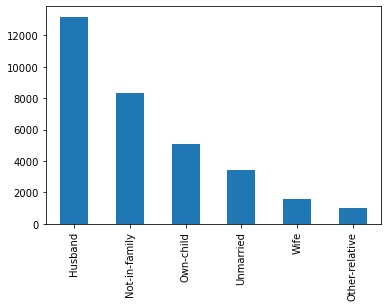

In [27]:
data['relationship'].value_counts().plot.bar()
plt.ylabel('')

In [28]:
data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

<ipython-input-29-02dcd8ea411f>:40: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


<Figure size 1440x360 with 0 Axes>

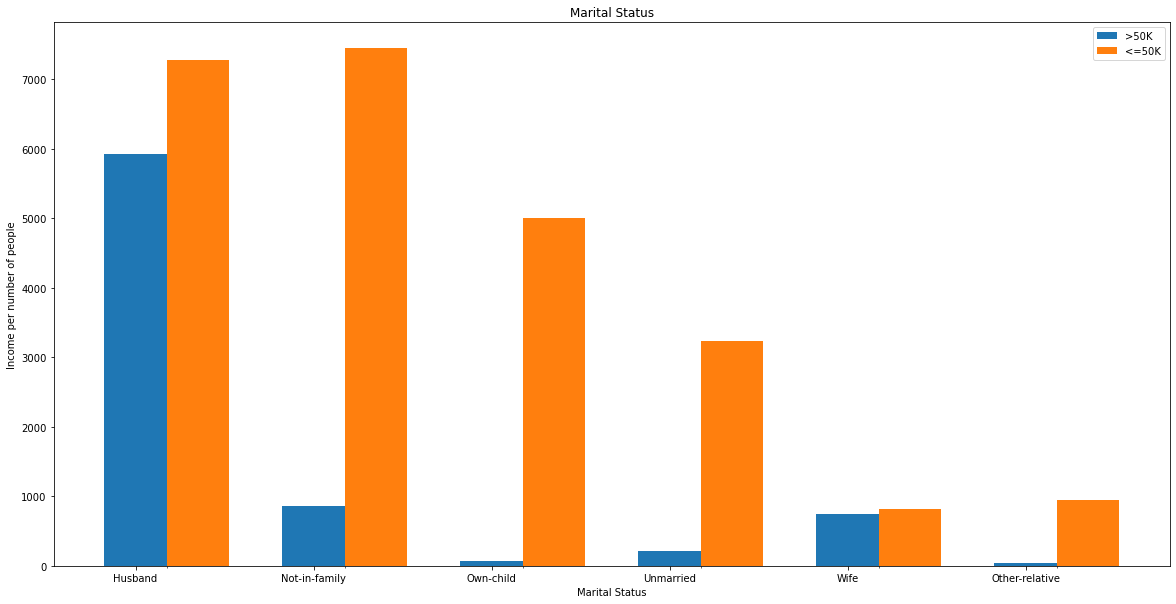

In [29]:
relationship = ['Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative']
temp1 = data[data['income']=='>50K']
ls1 = []
ls2 = []
for rel in relationship:
    d = temp1[temp1['relationship'] == rel]
    ls1.append(rel)
    count = d.shape[0]
    ls2.append(count)


temp2 = data[data['income']=='<=50K']
ls3 = []
ls4 = []
for rel in relationship:
    d = temp2[temp2['relationship'] == rel]
    ls3.append(rel)
    count = d.shape[0]
    ls4.append(count)

    
    
labels = ['Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(20,5))
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
rects1 = ax.bar(x - width/2, ls2, width, label='>50K',tick_label=labels)
rects2 = ax.bar(x + width/2, ls4, width, label='<=50K')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Income per number of people')
ax.set_xlabel('Marital Status')
ax.set_title('Marital Status')
ax.set_xticks(x, labels)
ax.legend()

plt.show()


Text(0, 0.5, '')

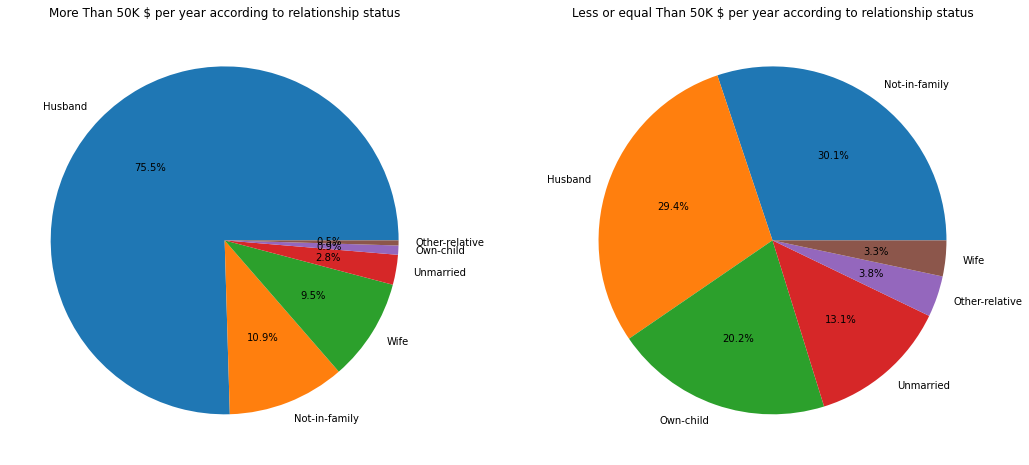

In [97]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['income'] == '>50K']['relationship'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('More Than 50K $ per year according to relationship status')
ax[0].set_ylabel('')
data[data['income'] == '<=50K']['relationship'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Less or equal Than 50K $ per year according to relationship status')
ax[1].set_ylabel('')

### Numerical Analysis

###### Age

Now we'll take a lot at the age distribuition of the census.

C:\Users\shail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

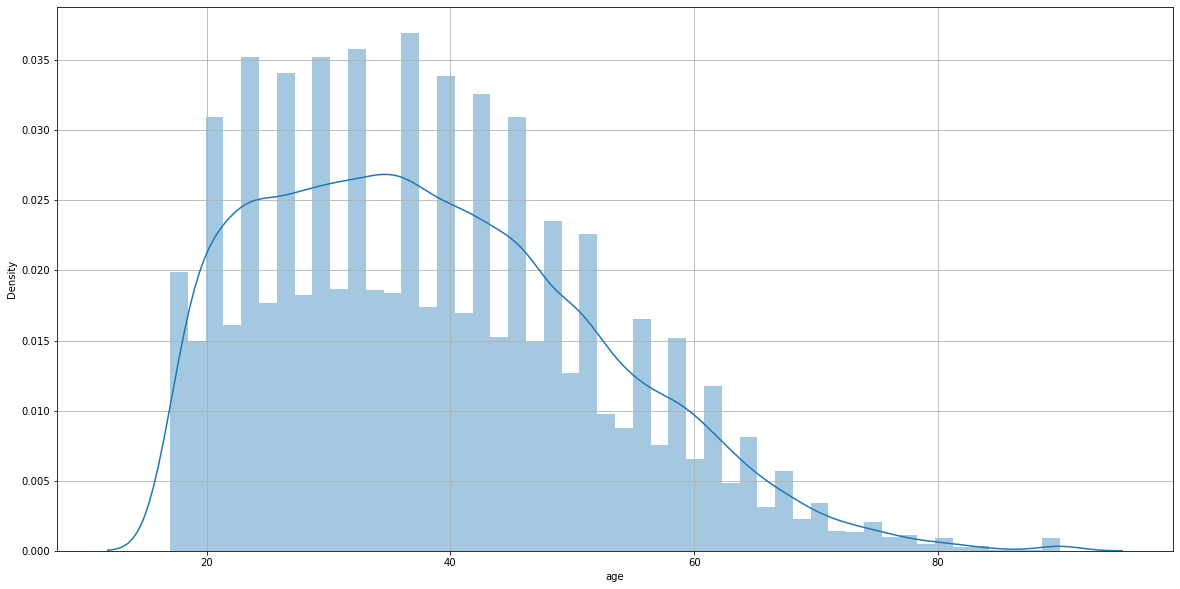

In [30]:
plt.figure(figsize=(20,10))
plt.grid()
sns.distplot(data['age'])

The age distribuition collected in the census is concentrated among from 20 y/o to the 50 y/o interval.

C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

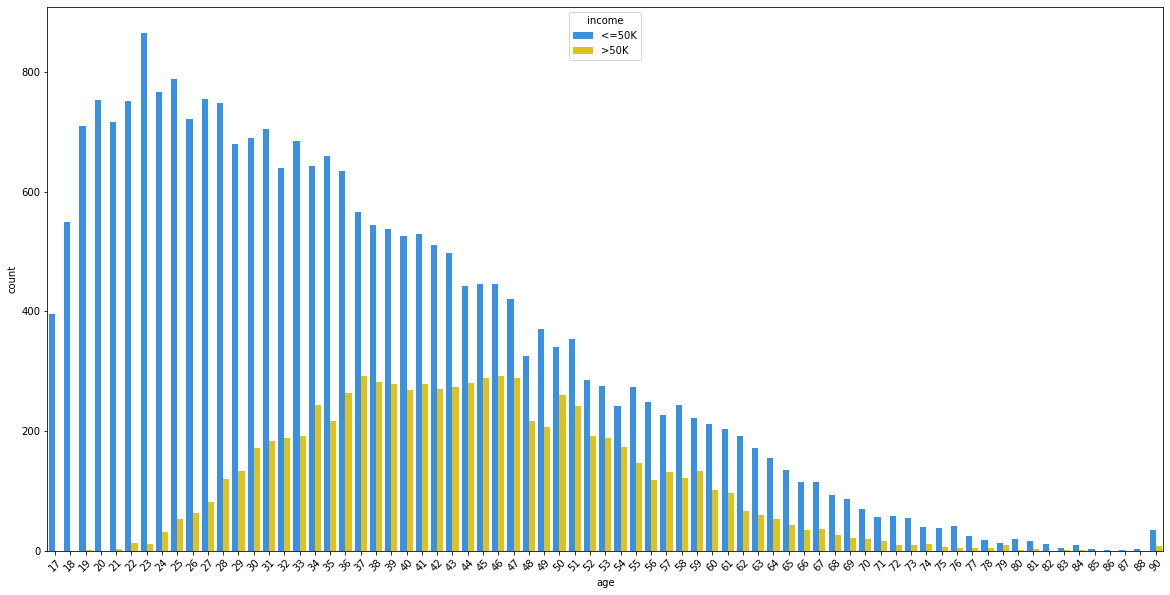

In [31]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
sns.countplot(data['age'], hue=data['income'], palette=['dodgerblue', 'gold'])

This plot give us a very useful information. As age grows, there are more people earning more than 50,000$, so we can say that, generally, income is correllated to age.

###### Hours Per Week

C:\Users\shail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours.per.week', ylabel='Density'>

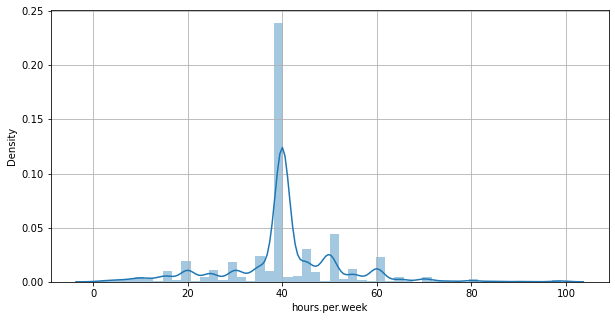

In [32]:
plt.figure(figsize=(10,5))
plt.grid()
sns.distplot(data['hours.per.week'])

The plot shows that most people in the census work 40 hours per week. Now, we'd like to know the hours per week distribuition of the people earning more than 50,000$.

Normally, people who earn more than 50,000$ per year have a 40 hours/week rutine. There are also a lot working for 45, 50 and 60 hours/week.

### Analysis based on Gender and Age

After analysing some of the important features, we realized that men tends to earn more than women according to given dataset. Hence we decided to execute a better analysis considering these two features and draw some useful information.

###### Gender and Workclass

We're going to have a look at the relations between gender and workclass and occupations, and what kind of jobs women mostly occupy in the census.

C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


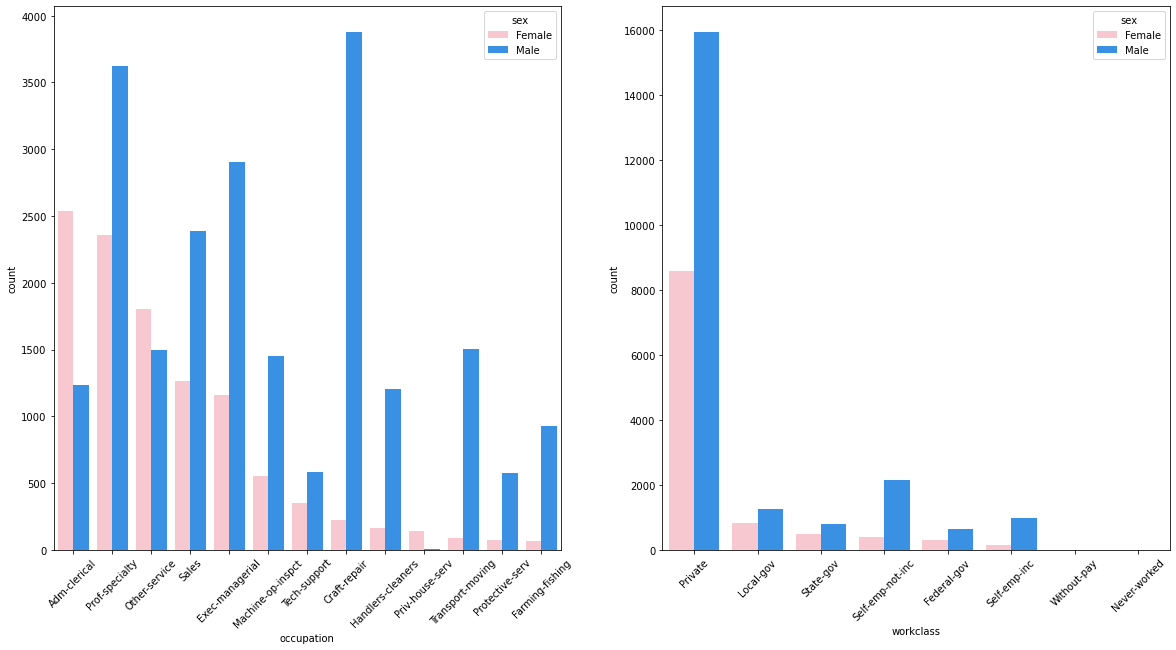

<Figure size 1440x720 with 0 Axes>

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.figure(figsize=(20, 10))
sns.countplot(data['workclass'], hue=data['sex'], ax=axs[1], palette=['pink', 'dodgerblue'], order=data[data['sex'] == 'Female']['workclass'].value_counts().index)
sns.countplot(data['occupation'], hue=data['sex'], ax=axs[0], palette=['pink', 'dodgerblue'], order=data[data['sex'] == 'Female']['occupation'].value_counts().index)
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)
plt.show()

Most women occupy the jobs related to clerical administration, cleaning services and other services, but jobs related to professor speciality, business and sales, engineering, technology, transport, protection service and primary sector are mostly occupied by men. It's also interesting to see that most gender gap in private sector and self employement is bigger than in other sectors.

###### Gender, Hours per week and Income

Examining any relationship between hours per week and income divided by gender.

C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


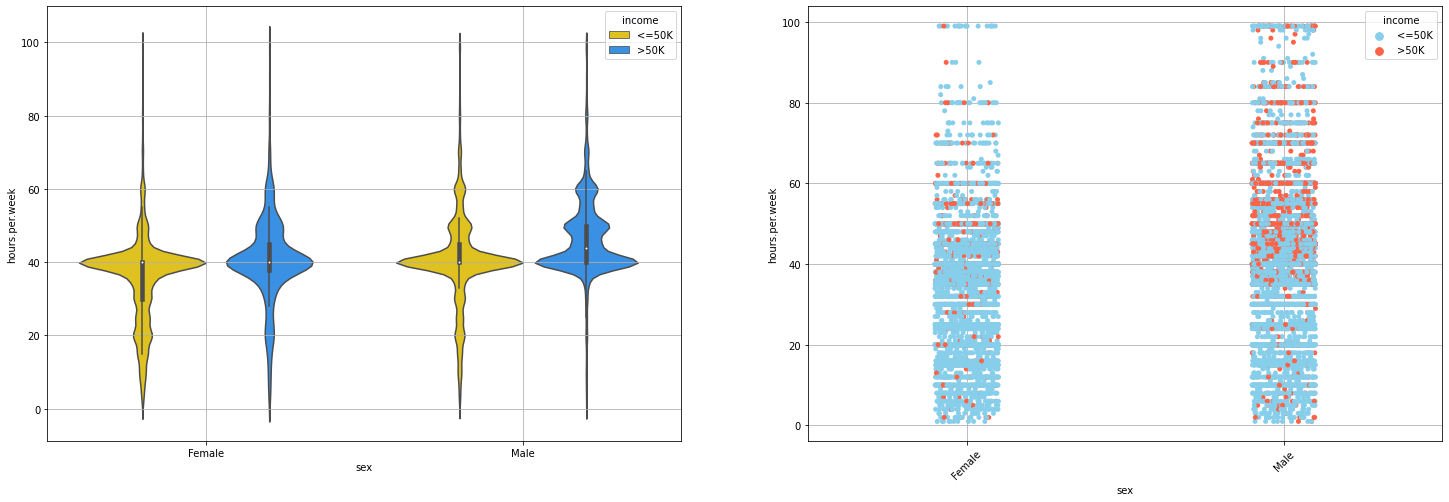

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))
plt.xticks(rotation=45)
sns.violinplot(data['sex'], data['hours.per.week'], hue=data['income'], palette=['gold', 'dodgerblue'], ax=ax[0])
sns.stripplot(data['sex'], data['hours.per.week'], hue=data['income'], palette=['skyblue', 'tomato'], ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)

The charts show that men work more for hours than women. The left chart show that, regardless of the income, there are more women working for less than men and the men chart is more distribuited above 40 hours per week. The right chart shows that men working more hours tend to earn more than 50,000$. We see a concentration of red dots among the 40 and 60 hours/week interval. On the other hand, this concentration doesn't appear women side. Even though the hours per week gap between men and women is not so big, it's clear that there's no correlation between hours per week and income when it comes to women.

###### Age, gender and Hours per week

C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


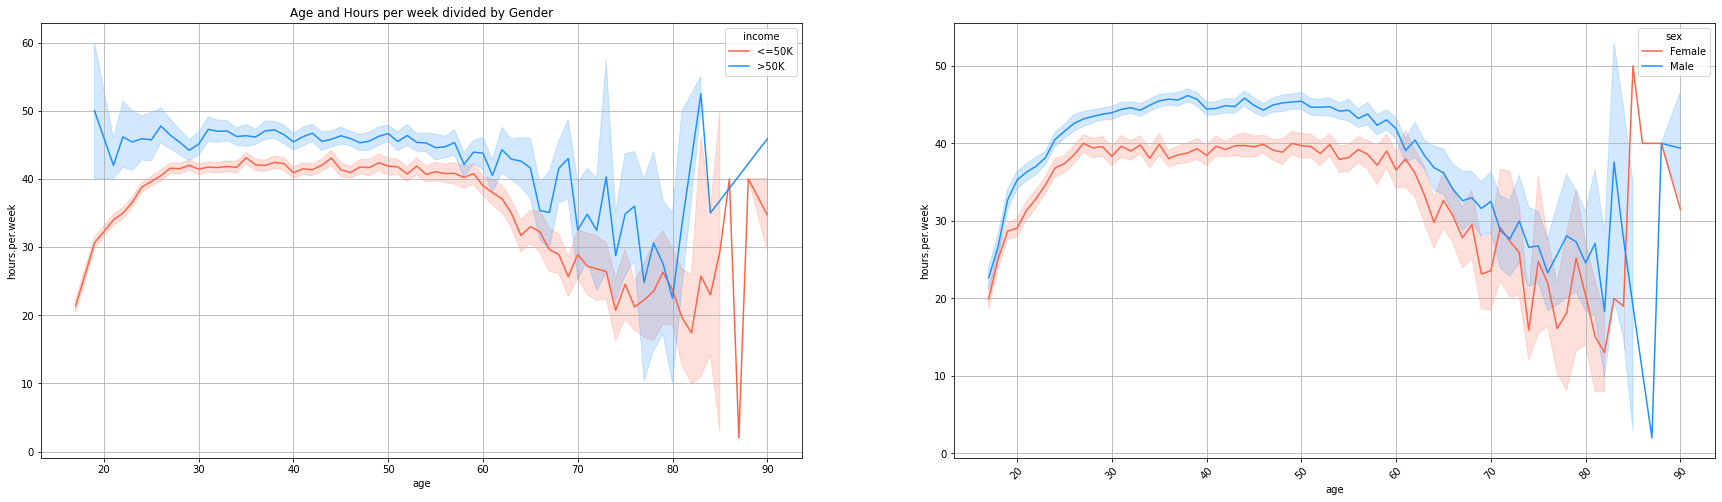

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(30, 8))
plt.xticks(rotation=45)
sns.lineplot(data['age'], data['hours.per.week'], hue=data['income'], palette=['tomato', 'dodgerblue'], ax=ax[0])
sns.lineplot(data['age'], data['hours.per.week'], hue=data['sex'], palette=['tomato', 'dodgerblue'], ax=ax[1])
ax[0].grid(True)
ax[0].title.set_text("Age and Hours per week divided by Income")
ax[1].grid(True)
ax[0].title.set_text("Age and Hours per week divided by Gender")

We see a very interesting trend in chart above. Let's take a loot at the left chart first. As the age grows, there are more people earning more than 50,000$ but work for more hours. In both cases, as age reaches the 60 year old, people tend to work for less hours but the number of people earning more than 50K increases. What's funny is that people who earn a lot start working for more hours when as they start turning 80.

The right chart shows very similar line paths. Men tend work for more hours than women, but as they get closer the standard retirement age, men and women work for the similar number of hours. What's very bizare, is that women who are 80 and 90 are the one working for more hours than the rest of ages.

## Data Cleaning and Foramtting

In [36]:
adult_income_prep = data.copy()

### Removing outliers

Outliers can be very harmful for our learning models and can cause noise that can create distorsions in our predictions. We'll create an auxiliar function to erase the outliers in each numerical feature.

In [37]:
def treat_outliers(data, column, upper=False, lower=False):
    Q1=adult_income_prep[column].quantile(0.25)
    Q3=adult_income_prep[column].quantile(0.75)
    IQR=Q3-Q1
    print(Q1)
    print(Q3)
    print(IQR)
    U_threshold = Q3+1.5*IQR
    #print(L_threshold, U_threshold)
    if upper: 
        adult_income_prep[column] = adult_income_prep[adult_income_prep[column] < U_threshold]
    if lower:
        adult_income_prep[column] = adult_income_prep[adult_income_prep[column] >= U_threshold]

###### Checking outliers in the age feature

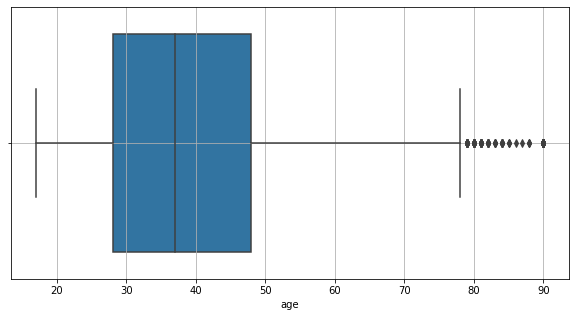

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['age'])
plt.grid()

We found outliers in our chart, so we'll erase them.

In [39]:
treat_outliers(data=adult_income_prep, column='age', upper=True)

28.0
48.0
20.0


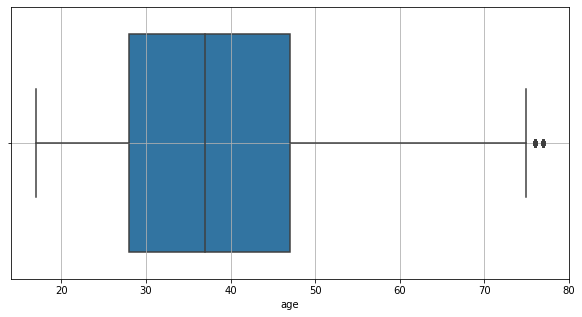

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['age'])
plt.grid()

In [41]:
treat_outliers(data=adult_income_prep, column='age', upper=True)

28.0
47.0
19.0


Checking again 

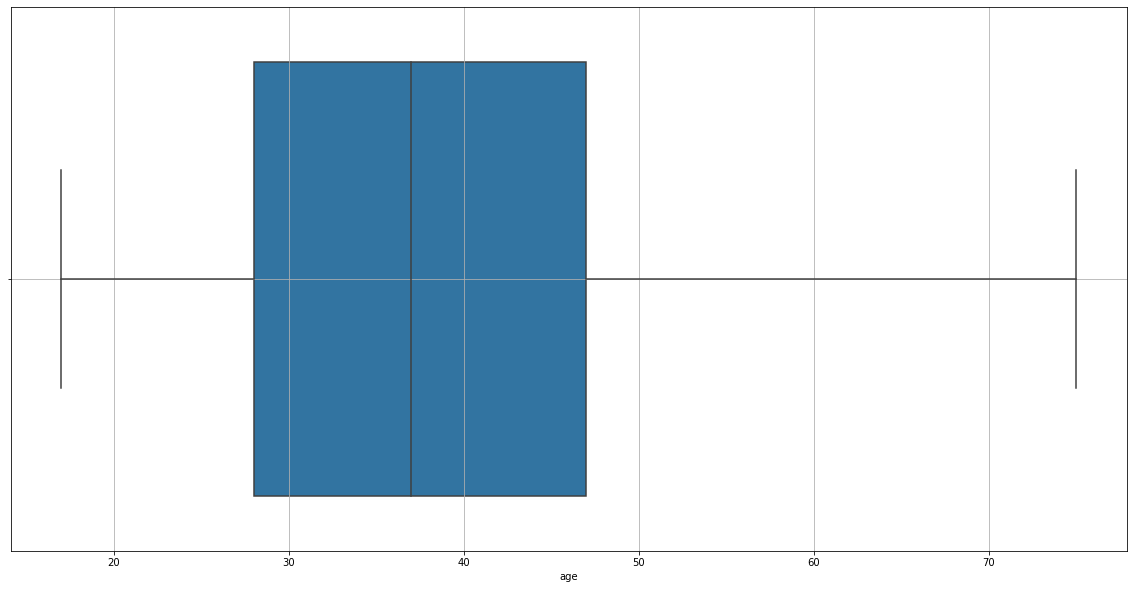

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['age'])
plt.grid()

###### Removing outliers of final Weight

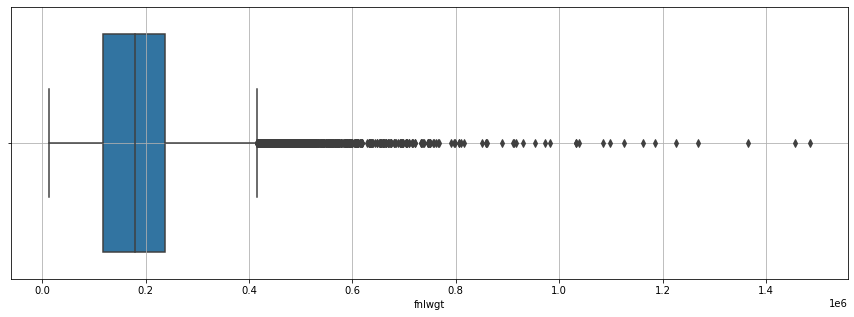

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['fnlwgt'])
plt.grid()

In [44]:
treat_outliers(data=adult_income_prep, column='fnlwgt', upper=True)

117827.0
237051.0
119224.0


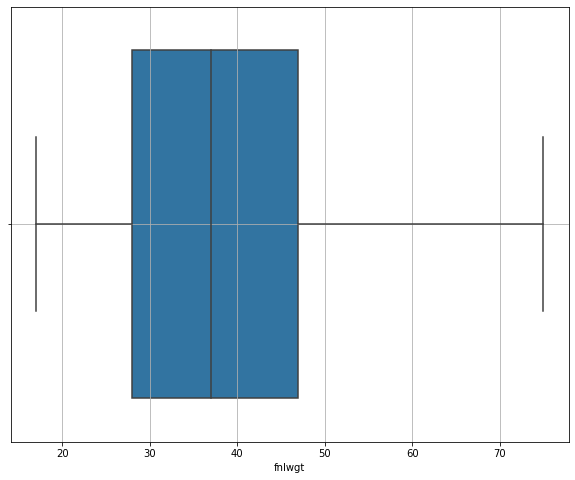

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['fnlwgt'])
plt.grid()

###### Checking outliers in Capital Gain and Loss

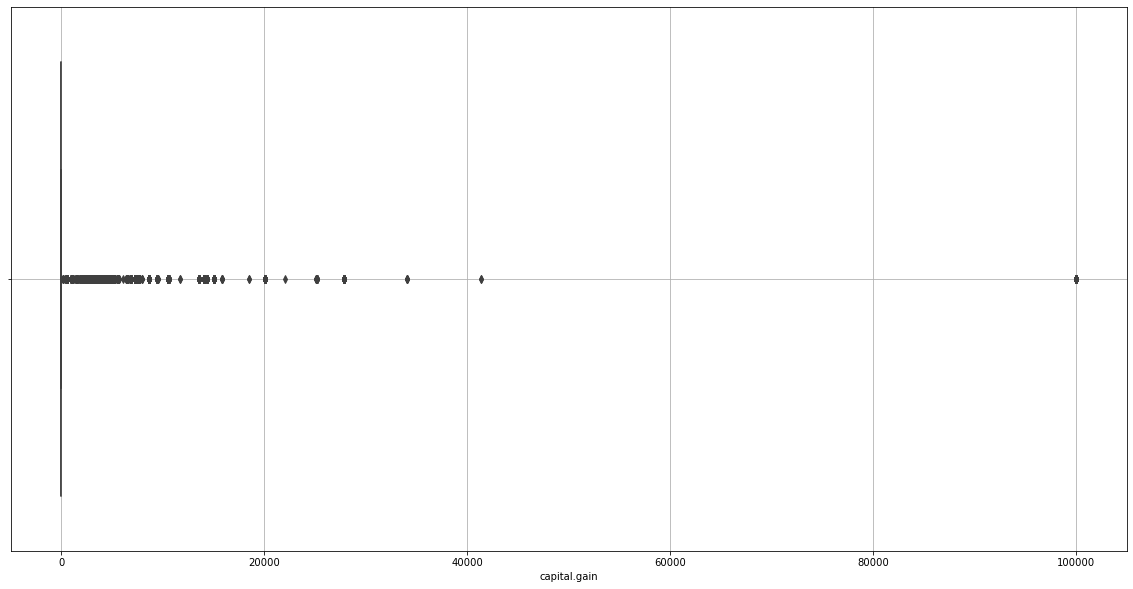

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['capital.gain'])
plt.grid()

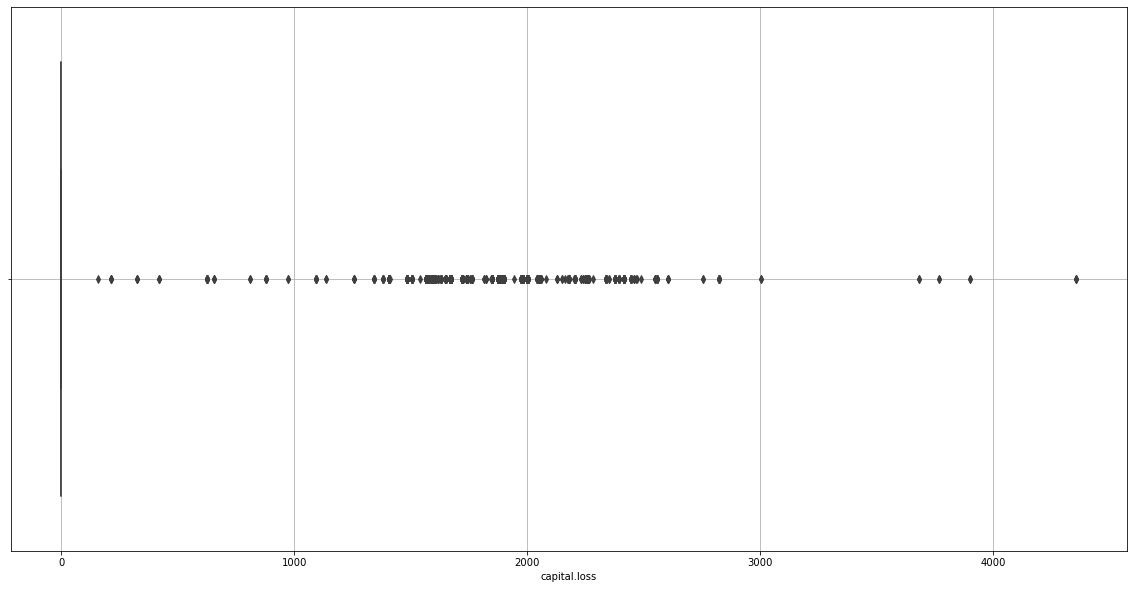

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['capital.loss'])
plt.grid()

We realize capital.gain and capital.loss will disturb our learning process as they don't give any useful information either.

###### Checking outliers of Hours per week

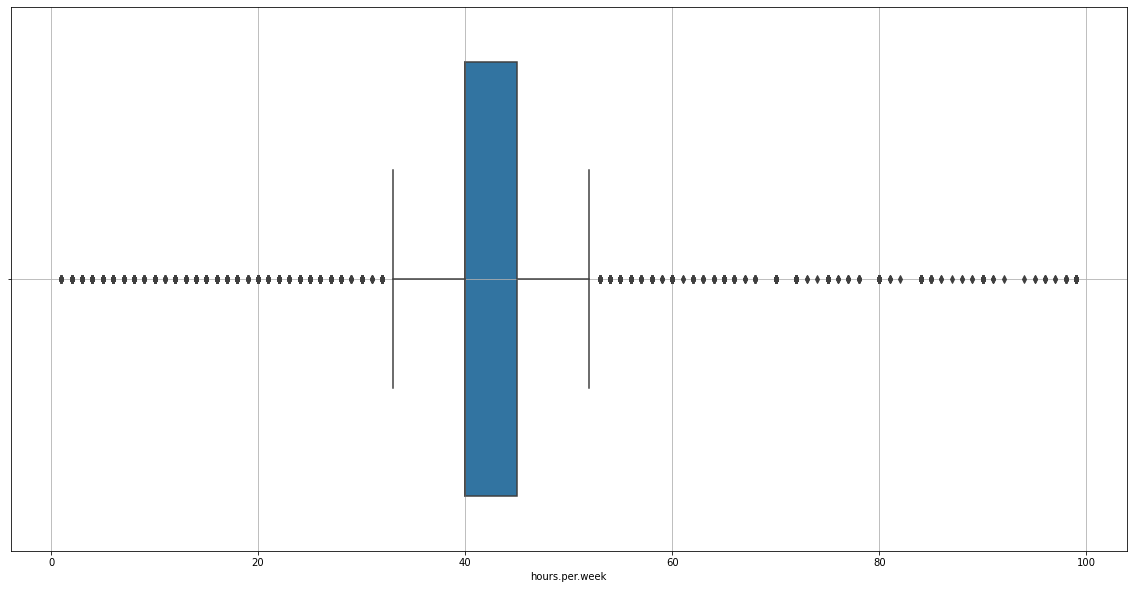

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['hours.per.week'])
plt.grid()

There are outliers, we must remove them.

In [49]:
treat_outliers(data=adult_income_prep, column='hours.per.week', upper=True, lower=True)

40.0
45.0
5.0


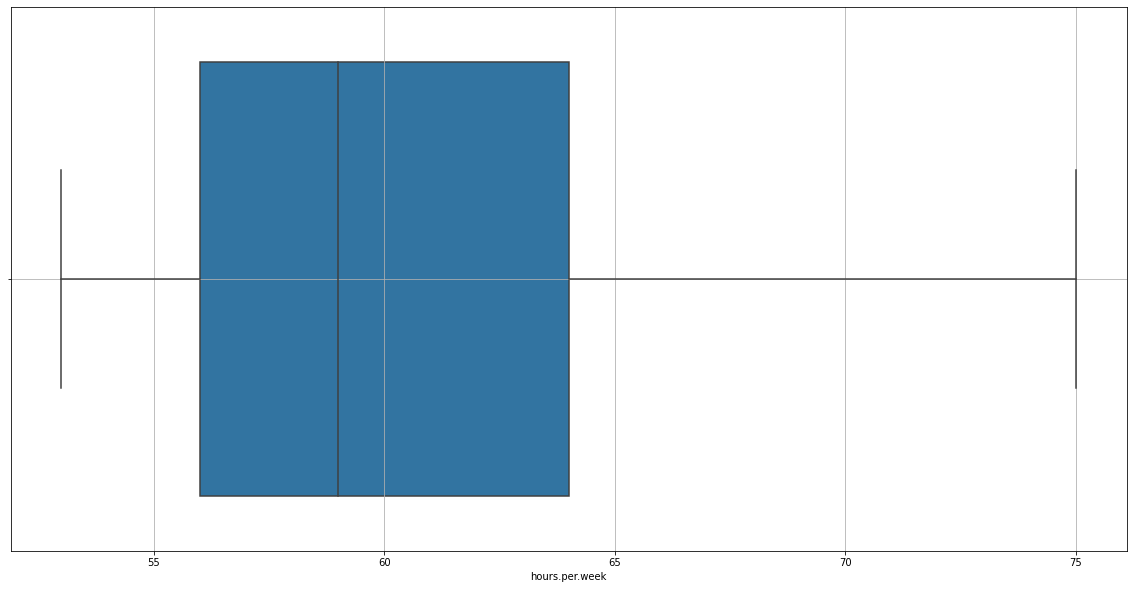

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(data=adult_income_prep, x=adult_income_prep['hours.per.week'])
plt.grid()

Now it's alright. Let's see how our dataset is now.

#### Analyzing the data and moving towards final training of the model

In [51]:
adult_income_prep.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,NaN,Private,NaN,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,NaN,United-States,<=50K
1,NaN,Private,NaN,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,NaN,United-States,<=50K
2,66.0,Private,66.0,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,66.0,United-States,<=50K
3,54.0,Private,54.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,54.0,United-States,<=50K
4,41.0,Private,41.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,NaN,United-States,<=50K


We found new null values in the age and fnlwgt column. We have to fill it the median value.

In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
adult_income_num = adult_income_prep[['age', 'fnlwgt', 'hours.per.week']]
adult_income_num.head()

,age,fnlwgt,hours.per.week
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,66.0,66.0,66.0
3,54.0,54.0,54.0
4,41.0,41.0,NaN


In [53]:
imputer.fit(adult_income_num)
X = imputer.transform(adult_income_num)
adult_tr = pd.DataFrame(X, columns=adult_income_num.columns)
adult_income_prep['age'] = adult_tr['age']
adult_income_prep['fnlwgt'] = adult_tr['fnlwgt']
adult_income_prep['hours.per.week'] = adult_tr['hours.per.week']

adult_income_prep.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,37.0,Private,37.0,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,59.0,United-States,<=50K
1,37.0,Private,37.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,59.0,United-States,<=50K
2,66.0,Private,66.0,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,66.0,United-States,<=50K
3,54.0,Private,54.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,54.0,United-States,<=50K
4,41.0,Private,41.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,59.0,United-States,<=50K


In [54]:
adult_income_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital.gain    32561 non-null  int64  
 11  capital.loss    32561 non-null  int64  
 12  hours.per.week  32561 non-null  float64
 13  native.country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


As we can see that there are no null values present

Changing income values by 0 and 1

In [55]:
adult_income_prep['income'] = adult_income_prep['income'].replace('<=50K', 0)
adult_income_prep['income'] = adult_income_prep['income'].replace('>50K', 1)

Since education and education.num is same, we will go ahead and remove education

In [56]:
adult_income_prep = adult_income_prep.drop(columns='education')

###### Category Encoding

During our learning process, we can not use non-numerical values, so it's better to encode our non-numerical features.

In [57]:
adult_income_prep.workclass = adult_income_prep.workclass.astype('category').cat.codes
adult_income_prep['marital.status'] = adult_income_prep['marital.status'].astype('category').cat.codes
adult_income_prep['occupation'] = adult_income_prep['occupation'].astype('category').cat.codes
adult_income_prep['relationship'] = adult_income_prep['relationship'].astype('category').cat.codes
adult_income_prep['race'] = adult_income_prep['race'].astype('category').cat.codes
adult_income_prep['sex'] = adult_income_prep['sex'].astype('category').cat.codes
adult_income_prep['native.country'] = adult_income_prep['native.country'].astype('category').cat.codes

In [58]:
adult_income_prep.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,37.0,3,37.0,9,6,9,1,4,0,0,4356,59.0,38,0
1,37.0,3,37.0,9,6,3,1,4,0,0,4356,59.0,38,0
2,66.0,3,66.0,10,6,9,4,2,0,0,4356,66.0,38,0
3,54.0,3,54.0,4,0,6,4,4,0,0,3900,54.0,38,0
4,41.0,3,41.0,10,5,9,3,4,0,0,3900,59.0,38,0


### Training Model

First we will descirbe the database to check if we have resolved the categorical features to continuous features and have 0 null values

In [59]:
adult_income_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int8   
 2   fnlwgt          32561 non-null  float64
 3   education.num   32561 non-null  int64  
 4   marital.status  32561 non-null  int8   
 5   occupation      32561 non-null  int8   
 6   relationship    32561 non-null  int8   
 7   race            32561 non-null  int8   
 8   sex             32561 non-null  int8   
 9   capital.gain    32561 non-null  int64  
 10  capital.loss    32561 non-null  int64  
 11  hours.per.week  32561 non-null  float64
 12  native.country  32561 non-null  int8   
 13  income          32561 non-null  int64  
dtypes: float64(3), int64(4), int8(7)
memory usage: 2.0 MB


In [60]:
y = adult_income_prep['income']
X_prepared = adult_income_prep.drop(columns='income')

In [61]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_prepared, y, random_state = 0)

Creating dictionaries containing the Mean Absolute Error and the accuracy value of each algorithm.

In [62]:
from sklearn.model_selection import cross_val_score
MAE = dict()
Acc = dict() 

#### Logistic Regression

From Logistic Regression our main aim is to extract features who have a better or worse influence on the prediction/accuracy

In [63]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
score = cross_val_score(log_model, X_prepared, y, scoring="neg_mean_absolute_error", cv=10)

C:\Users\shail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [64]:
print("MAE score mean:\n", np.abs(score).mean())

MAE score mean:
 0.21196281831836022


In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [0.001,0.01,0.1,1,10,100]},
]
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

C:\Users\shail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error')

In [66]:
grid_search.best_params_ # for finding the best paramateres

{'C': 100}

In [67]:
log_model = LogisticRegression(C=100, random_state=0)
log_model.fit(train_X, train_y)

C:\Users\shail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, random_state=0)

In [68]:
val_predictions = log_model.predict(val_X)
columns = adult_income_prep.drop(columns='income').columns
coefs = log_model.coef_[0]
print("Features - Coefs")
for index in range(len(coefs)):
    print(columns[index], ":", coefs[index])

Features - Coefs
age : 0.04330804447265914
workclass : -0.010959162209384782
fnlwgt : -0.002044799514673439
education.num : 0.35985708083748985
marital.status : -0.16117246735455082
occupation : -0.029070492698821945
relationship : -0.22961726914238184
race : 0.03943669402528584
sex : 0.08449507328136217
capital.gain : 0.0003214770526594809
capital.loss : 0.0007024727384440753
hours.per.week : -0.11150012948972016
native.country : 0.009176629856042704


Its pretty interesting to see the weights of each features in order to figure out which features have most impact on the model

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

lm_mae = mean_absolute_error(val_y, val_predictions)
lm_acc = accuracy_score(val_y, val_predictions)
MAE['lm'] = lm_mae
Acc['lm'] = lm_acc

In [70]:
print("The mae is", lm_mae)

The mae is 0.17909347745977153


In [71]:
print("The accuracy is", lm_acc * 100, "%")

The accuracy is 82.09065225402284 %


In [138]:
from sklearn.metrics import confusion_matrix,classification_report

In [140]:
confusion_matrix(val_y,val_predictions)

array([[5904,  289],
       [1310,  638]], dtype=int64)

In [139]:
print(classification_report(val_y,val_predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6193
           1       0.69      0.33      0.44      1948

    accuracy                           0.80      8141
   macro avg       0.75      0.64      0.66      8141
weighted avg       0.79      0.80      0.78      8141



#### Now we will try some of the modern classifiers, like:-
#### 1.) Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
# This param grid is made for hyperparameter tuning(in order to find the best parameters for our model)

forest_model = RandomForestClassifier()
grid_search = GridSearchCV(forest_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [151]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [152]:
rf_model = RandomForestClassifier(max_features=2, n_estimators=30, random_state=0)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, n_estimators=30, random_state=0)

In [153]:
val_predictions = rf_model.predict(val_X)
rf_mae = mean_absolute_error(val_y, val_predictions)
rf_mae

0.15268394546124556

In [154]:
rf_acc = accuracy_score(val_y, val_predictions)
rf_acc

0.8473160545387545

In [155]:
MAE['rf'] = rf_mae
Acc['rf'] = rf_acc

In [156]:
print('CONFUSION MATRIX \n\n',confusion_matrix(val_y,val_predictions))
print('\n\n')
print('CLASSIFICATION REPORT\n\n',classification_report(val_y,val_predictions))

CONFUSION MATRIX 

 [[5735  458]
 [ 785 1163]]



CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6193
           1       0.72      0.60      0.65      1948

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



As we can see, we are getting a bettern accuracy score than traditional Logistic Regression.

#### 2.) K Nearest Neighbour

In [157]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [158]:
knn_model = KNN()

param_grid = {'n_neighbors':range(5,10,1)}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(train_X, train_y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 10)},
             scoring='neg_mean_squared_error')

In [159]:
knn_params = grid_search.best_params_
knn_params

{'n_neighbors': 8}

In [160]:
knn_model = KNN(n_neighbors=8)

In [161]:
knn_model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=8)

In [162]:
val_predictions = knn_model.predict(val_X)
knn_mae = mean_absolute_error(val_y, val_predictions)
knn_mae

0.1486303893870532

In [163]:
knn_acc = accuracy_score(val_y, val_predictions)
knn_acc

0.8513696106129468

In [164]:
MAE['knn'] = knn_mae
Acc['knn'] = knn_acc

In [165]:
print('CONFUSION MATRIX \n\n',confusion_matrix(val_y,val_predictions))
print('\n\n')
print('CLASSIFICATION REPORT\n\n',classification_report(val_y,val_predictions))

CONFUSION MATRIX 

 [[5875  318]
 [ 892 1056]]



CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6193
           1       0.77      0.54      0.64      1948

    accuracy                           0.85      8141
   macro avg       0.82      0.75      0.77      8141
weighted avg       0.84      0.85      0.84      8141



K Nearest Neighbour also performs better than tradition Logistic Regression and also Random Forest

#### 3.) Naive Bayes

In [166]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(train_X, train_y)

GaussianNB()

In [167]:
val_predictions = GNB.predict(val_X)

In [168]:
GNB_mae = mean_absolute_error(val_y, val_predictions)

In [169]:
GNB_mae

0.19641321704950251

In [170]:
GNB_acc = accuracy_score(val_y, val_predictions)
GNB_acc

0.8035867829504975

In [171]:
MAE['gnb'] = GNB_mae
Acc['gnb'] = GNB_acc

In [172]:
print('CONFUSION MATRIX \n\n',confusion_matrix(val_y,val_predictions))
print('\n\n')
print('CLASSIFICATION REPORT\n\n',classification_report(val_y,val_predictions))

CONFUSION MATRIX 

 [[5904  289]
 [1310  638]]



CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      6193
           1       0.69      0.33      0.44      1948

    accuracy                           0.80      8141
   macro avg       0.75      0.64      0.66      8141
weighted avg       0.79      0.80      0.78      8141



Now let's summarize all the models that we have used in order to find which give the maximum accuracy and minimum Mean Absolute Error

Text(0.5, 1.0, 'Accuracy score')

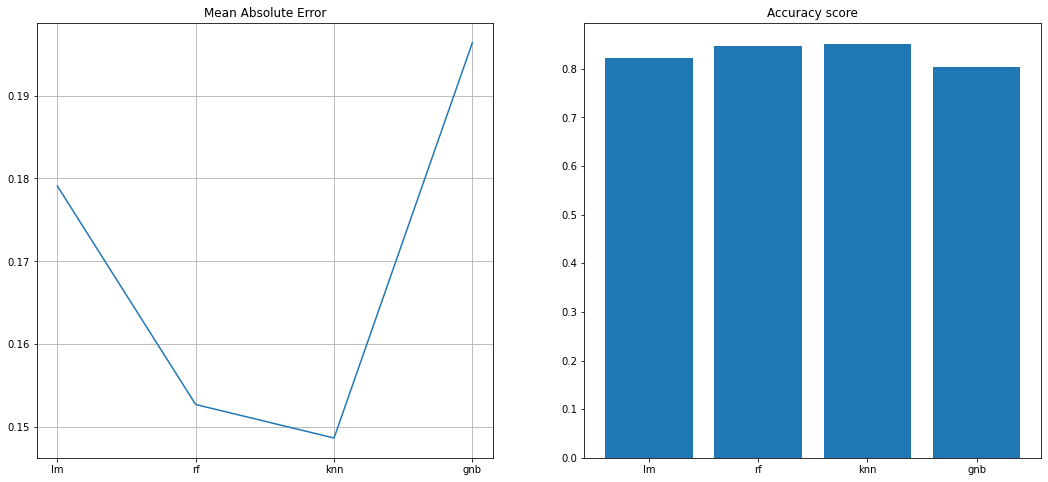

In [92]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].plot(list(MAE.keys()), list(MAE.values()))
ax[0].set_title("Mean Absolute Error")
ax[0].grid()
ax[1].bar(list(Acc.keys()), list(Acc.values()))
ax[1].set_title("Accuracy score")

# Thank You